<a href="https://colab.research.google.com/github/snsamarasekara/Data-Analysis-Projects/blob/main/BrainMRI1_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
zf = "/content/archive copy 2.zip"
target_dir = "/content/dataset/BrainMRI2"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
#Define Directories for train, test & Validation Set

train_path = "/content/dataset/BrainMRI2/archive copy/Training"
test_path ="/content/dataset/BrainMRI2/archive copy/Testing"

#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 500x500 img_height = 500
img_width = 500

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
img_height = 500
img_width = 500

train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
 
      class_mode='binary',
      batch_size=batch_size
      )


Found 2916 images belonging to 2 classes.
Found 705 images belonging to 2 classes.


<function matplotlib.pyplot.show(*args, **kw)>

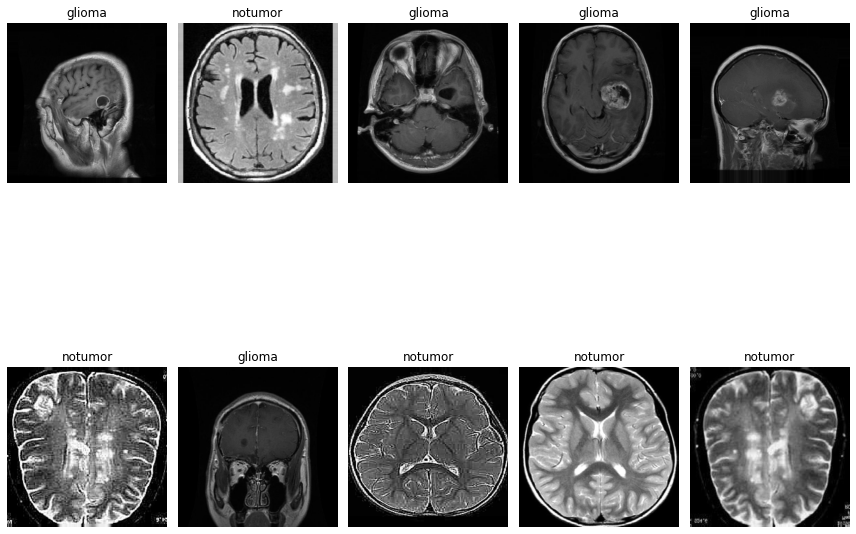

In [ ]:
plt.figure(figsize=(12, 12)) 
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'glioma', 1:'notumor'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),'gray')
        break
plt.tight_layout()
plt.show

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
cnn = Sequential() #CNN model architecture
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #compiling the model the optimizer and loss defined


In [ ]:
early = EarlyStopping(monitor="val_loss",mode="min",patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
cnn.fit(train,epochs=25, validation_data=test, class_weight= (), callbacks=callbacks_list) #train the model

Epoch 1/25
183/183 [==============================] - 62s 334ms/step - loss: 0.2219 - accuracy: 0.8975 - val_loss: 0.1200 - val_accuracy: 0.9447 - lr: 0.0010
Epoch 2/25
183/183 [==============================] - 57s 311ms/step - loss: 0.1060 - accuracy: 0.9623 - val_loss: 0.0276 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 3/25
183/183 [==============================] - 57s 312ms/step - loss: 0.0784 - accuracy: 0.9750 - val_loss: 0.0615 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 4/25
183/183 [==============================] - 57s 310ms/step - loss: 0.0762 - accuracy: 0.9729 - val_loss: 0.0046 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/25
183/183 [==============================] - 57s 312ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.0024 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/25
183/183 [==============================] - 59s 321ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.0654 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 7/25
183/183 [==============================] 

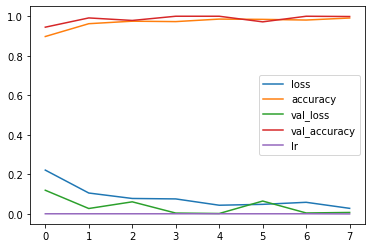

In [ ]:
pd.DataFrame(cnn.history.history).plot()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

45/45 [==============================] - 3s 56ms/step - loss: 0.0077 - accuracy: 0.9986
The testing accuracy is : 99.858158826828 %


In [ ]:
preds = cnn.predict(test,verbose=1)

45/45 [==============================] - 3s 59ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [ ]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['glioma','notumor']))

              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       300
     notumor       1.00      1.00      1.00       405

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



1/1 [==============================] - 0s 61ms/step


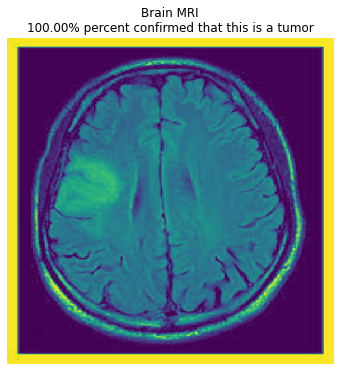

In [ ]:
# Testing different Chest X-Ray image
My_path = "/content/download.jpg"
from tensorflow.keras.preprocessing import image
My_img = image.load_img(My_path, target_size=(500, 500),color_mode='grayscale')
# Preprocessing the image
pp_My_img = image.img_to_array(My_img)
pp_My_img = pp_My_img/255
pp_My_img = np.expand_dims(pp_My_img, axis=0)
#predict
My_preds= cnn.predict(pp_My_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if My_preds>= 0.5: 
    out = ('{:.2%} percent confirmed that this is a tumor'.format(My_preds[0][0]))
    
else: 
    out = ('{:.2%} percent confirmed that this is a Normal case'.format(1-My_preds[0][0]))
plt.title("Brain MRI\n"+out)  
plt.imshow(np.squeeze(pp_My_img))
plt.show()